---
## Assignment 1.1: Temporal Overview

Let's start by getting the big picture of how crime has changed over the full 20+ year period covered by your combined dataset.

*Draws from*: Week 1, Exercises 4.1 and 4.2 — applied here to the full merged dataset (2003–present) rather than just 2018–present.

> * Using your combined dataset (2003–present), plot the total number of incidents **per year** for each of your Personal Focus Crimes. Display at least the years 2003–2025. 
> * Make sure your plot follows good visualization practices: labeled axes, a legend, a descriptive title.
> * Identify and comment on at least two notable features in the plot — for example, long-term trends, sudden drops or spikes, or the impact of COVID-19 in 2020. For each feature, offer a possible explanation.

In [30]:
import pandas as pd
df = pd.read_csv('merged_sfpd.csv')
df['incident_category'] = df['incident_category'].replace('Larceny Theft', 'LARCENY/THEFT')
df['incident_category'] = df['incident_category'].str.upper()


In [36]:
df['incident_category'].value_counts().head(10)

incident_category
LARCENY/THEFT     772367
OTHER OFFENSES    310616
ASSAULT           232167
NON-CRIMINAL      217374
BURGLARY          147190
VEHICLE THEFT     126228
DRUG/NARCOTIC     117821
VANDALISM         117039
SUSPICIOUS OCC    100515
WARRANTS           99821
Name: count, dtype: int64

In [ ]:
personal_focus = [
    'LARCENY/THEFT',
    'ASSAULT',
    'NON-CRIMINAL',
    'BURGLARY',
    'VEHICLE THEFT',
    'DRUG/NARCOTIC',
    'VANDALISM',
    'SUSPICIOUS OCC',
    'WARRANTS' 
]

df_pf = df[df['incident_category'].isin(personal_focus)].copy()

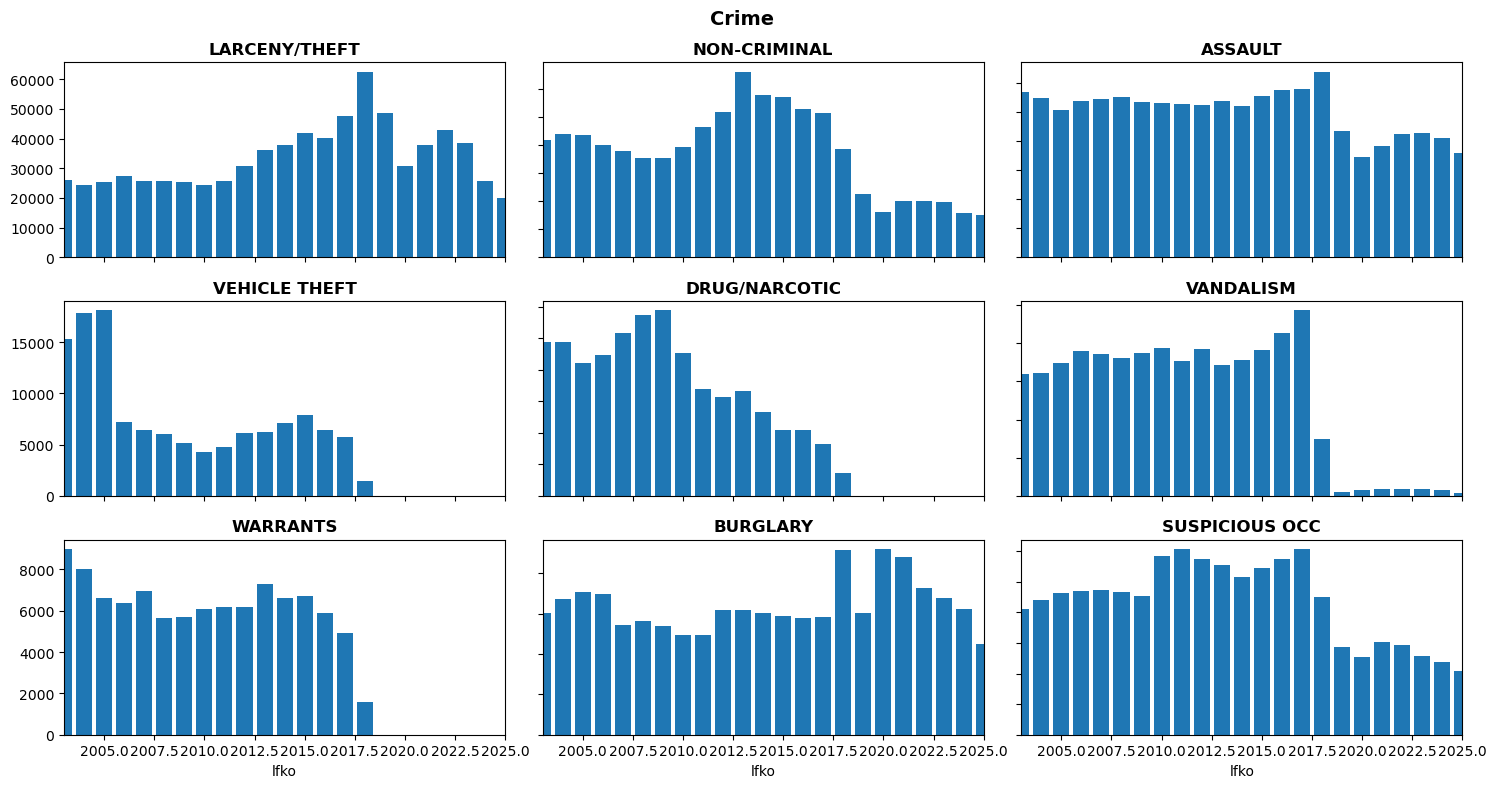

In [34]:
import matplotlib.pyplot as plt

# Fix a consistent category order for all plots
category_order = personal_focus
rows, cols = 3,3

fig, ax = plt.subplots(rows, cols, figsize=(15, 8))
fig.suptitle('Crime ', fontsize=14, fontweight='bold')

# Set a shared x-axis range for all subplots
x_min, x_max = 2003, 2025

for i, crime in enumerate(personal_focus):
    row = i // cols
    col = i % cols
    plot_value = df_pf[df_pf['incident_category']==crime]['incident_year'].value_counts().reset_index().sort_values(by='incident_year')
    ax[row, col].bar(plot_value['incident_year'], plot_value.values[:, 1])
    ax[row, col].set_title(crime, fontweight='bold')
    ax[row, col].set_xlim(x_min, x_max)

    # Show category labels only on the leftmost column
    if col != 0:
        ax[row, col].set_yticklabels([])
        ax[row, col].set_ylabel("")

    # Show x-axis labels only on the bottom row
    if row != rows - 1:
        ax[row, col].set_xticklabels([])
        ax[row, col].set_xlabel("")
    else:
        ax[row, col].set_xlabel("lfko")

plt.tight_layout()
plt.show()